# Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [33]:
df=pd.read_csv(r'Expanded_data_with_more_features.csv')

In [ ]:
df.head()

In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


# EDA and Data Cleaning

In [6]:
for col in df.describe(include='object'):
    print(col)
    print(df[col].unique())
    print('-'*50)

Gender
['female' 'male']
--------------------------------------------------
EthnicGroup
[nan 'group C' 'group B' 'group A' 'group D' 'group E']
--------------------------------------------------
ParentEduc
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
--------------------------------------------------
LunchType
['standard' 'free/reduced']
--------------------------------------------------
TestPrep
['none' nan 'completed']
--------------------------------------------------
ParentMaritalStatus
['married' 'single' 'widowed' nan 'divorced']
--------------------------------------------------
PracticeSport
['regularly' 'sometimes' 'never' nan]
--------------------------------------------------
IsFirstChild
['yes' 'no' nan]
--------------------------------------------------
TransportMeans
['school_bus' nan 'private']
--------------------------------------------------
WklyStudyHours
['< 5' '5 - 10' '> 10' nan]
----------------

In [ ]:
df.isnull().sum()
#there is no need to remove null values because we want to analyze and perform actons on Score Columns which are non-null.

# Gender Distribute

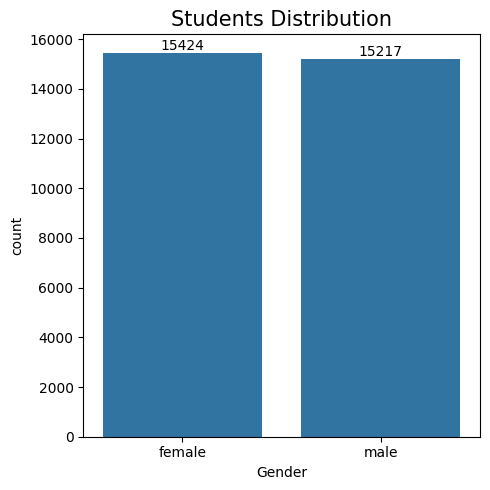

In [158]:
#Count plot to count Male and Female Students
plt.figure(figsize=(5, 5))
ax= sns.countplot( data= df, x= "Gender")
ax.bar_label(ax.containers[0])
plt.title("Students Distribution", fontsize= 15)
plt.tight_layout()
plt.savefig("Students Distribution", dpi =300)
plt.show()

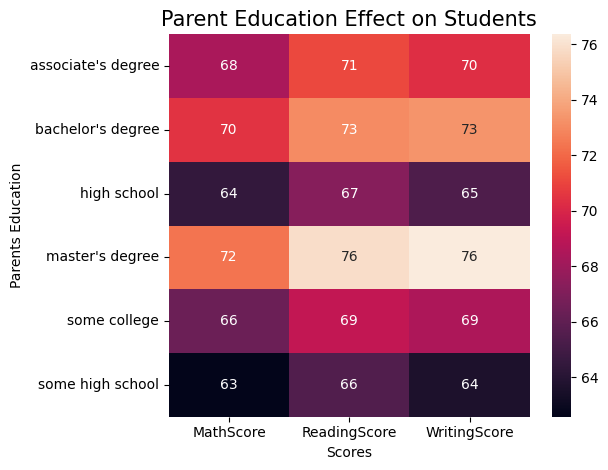

In [159]:
grouped = df.groupby("ParentEduc").agg({"MathScore": "mean", "ReadingScore": "mean" , "WritingScore": "mean"})
#Create Heatmap to check relation
sns.heatmap( grouped , annot = True)
plt.title("Parent Education Effect on Students", fontsize= 15)
plt.xlabel("Scores")
plt.ylabel("Parents Education")
plt.tight_layout()
plt.show()

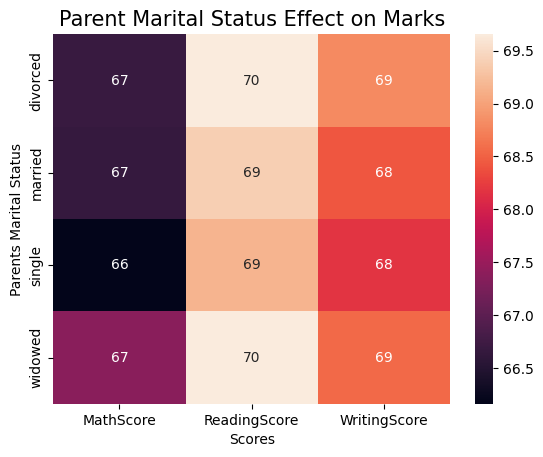

In [137]:
grouped1 = df.groupby("ParentMaritalStatus").agg({"MathScore": "mean", "ReadingScore": "mean" , "WritingScore": "mean"})

sns.heatmap( grouped1 , annot = True)
plt.title("Parent Marital Status Effect on Marks", fontsize= 15)
plt.xlabel("Scores")
plt.ylabel("Parents Marital Status")

plt.show()

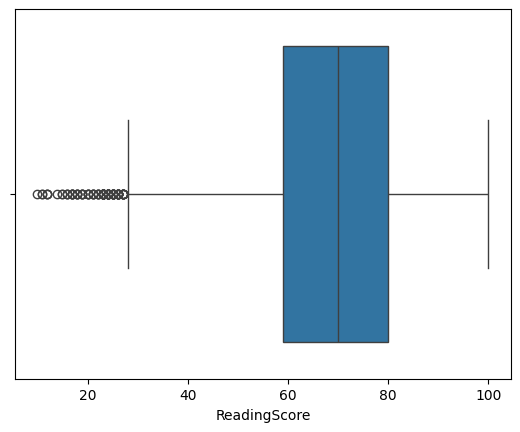

In [53]:
sns.boxplot( data =df , x="ReadingScore")
plt.show()

# Ethnic Group Distribution

In [55]:
df["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

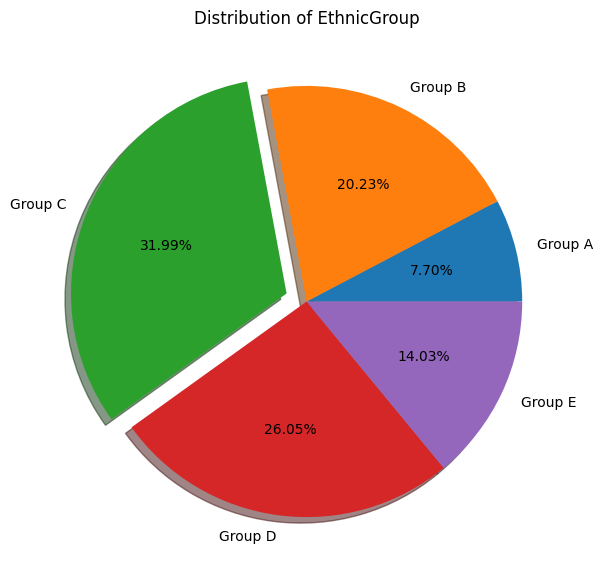

In [138]:
groupA = df.loc[df["EthnicGroup"] == "group A"].count()
groupB = df.loc[df["EthnicGroup"] == "group B"].count()
groupC = df.loc[df["EthnicGroup"] == "group C"].count()
groupD = df.loc[df["EthnicGroup"] == "group D"].count()
groupE = df.loc[df["EthnicGroup"] == "group E"].count()


labels= ["Group A", "Group B", "Group C", "Group D", "Group E"]  
group_list = [ groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
plt.figure(figsize = (7,7))
ex = [0,0,0.1,0,0]
plt.pie( group_list ,  labels = labels, shadow = True , explode = ex , autopct = "%1.2f%%" )
plt.title("Distribution of EthnicGroup")
plt.savefig("Distribution of EthnicGroup")
plt.show()



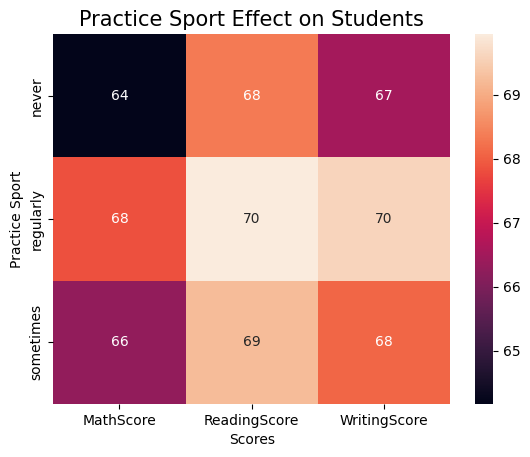

In [139]:
grouped2 = df.groupby("PracticeSport").agg({"MathScore": "mean", "ReadingScore": "mean" , "WritingScore": "mean"})

sns.heatmap( grouped2 , annot = True)
plt.title("Practice Sport Effect on Students", fontsize= 15)
plt.xlabel("Scores")
plt.ylabel("Practice Sport")
plt.savefig("Practice Sport Effect on Students", dpi = 300)
plt.show()


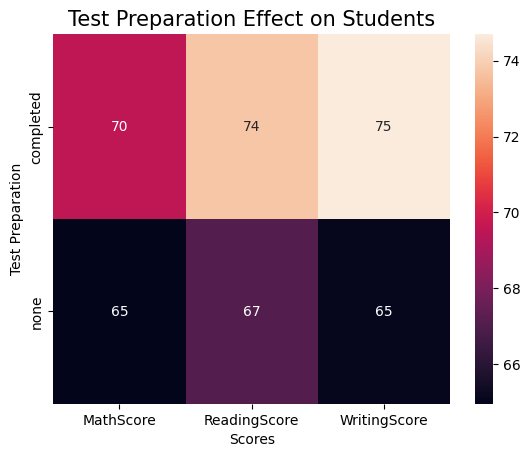

In [142]:
grouped3 = df.groupby("TestPrep").agg({"MathScore": "mean", "ReadingScore": "mean" , "WritingScore": "mean"})

sns.heatmap( grouped3 , annot = True)
plt.title("Test Preparation Effect on Students", fontsize= 15)
plt.xlabel("Scores")
plt.ylabel("Test Preparation")
plt.savefig("Test Preparation Effect on Students", dpi =300)
plt.show()


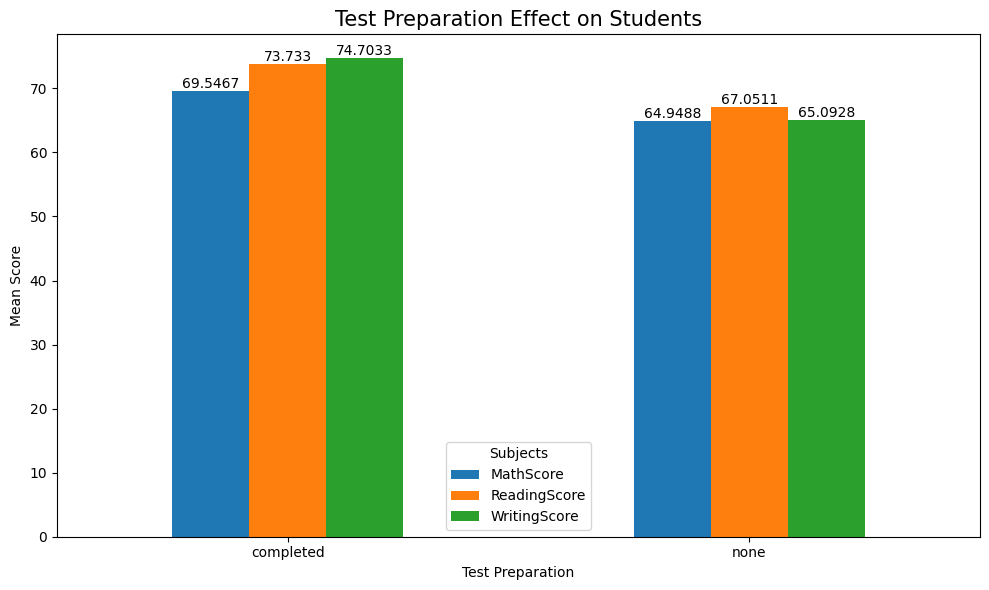

In [146]:
grouped3 = df.groupby("TestPrep").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})

# Plotting
ax =grouped3.plot(kind='bar', figsize=(10, 6))
#ax.bar_label(ax.containers[0])
plt.title("Test Preparation Effect on Students", fontsize = 15)
plt.xlabel('Test Preparation')
plt.ylabel('Mean Score')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Subjects')
plt.tight_layout()  # Adjust layout to make room for labels

# Adding bar labels for all containers
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

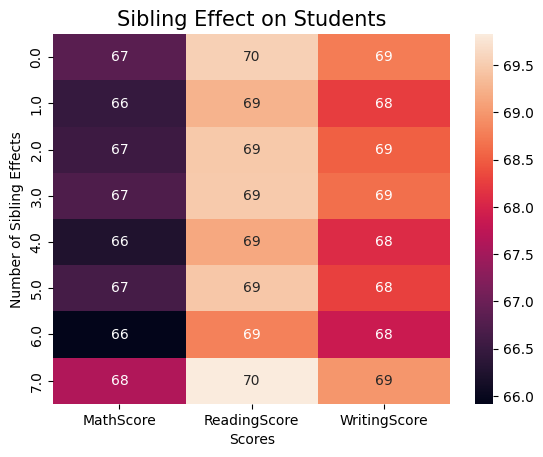

In [147]:
grouped5 = df.groupby("NrSiblings").agg({"MathScore": "mean", "ReadingScore": "mean" , "WritingScore": "mean"})

sns.heatmap( grouped5 , annot = True)
plt.title("Sibling Effect on Students", fontsize= 15)
plt.xlabel("Scores")
plt.ylabel("Number of Sibling Effects")

plt.show()

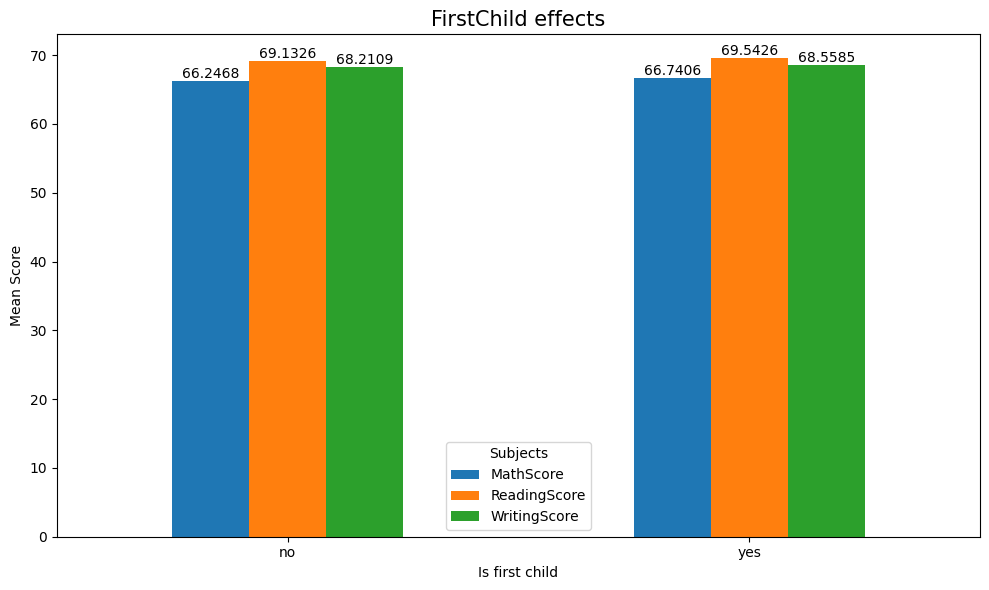

In [149]:
grouped4 = df.groupby("IsFirstChild").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})

ax =grouped4.plot(kind='bar', figsize=(10, 6))

plt.title("FirstChild effects", fontsize = 15)
plt.xlabel('Is first child')
plt.ylabel('Mean Score')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Subjects')
plt.tight_layout()  # Adjust layout to make room for labels
plt.savefig("First Child Effects",dpi =300)
# Adding bar labels for all containers
for container in ax.containers:
    ax.bar_label(container)
    
plt.show()


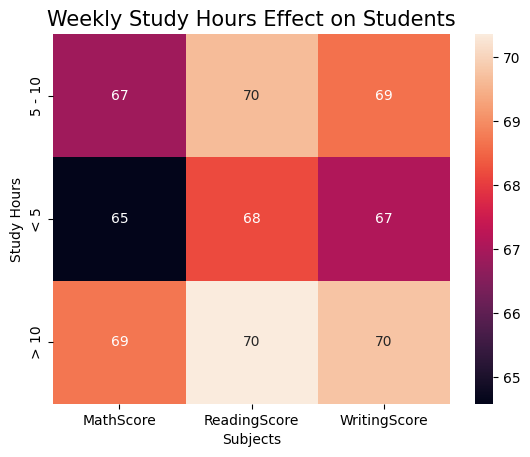

In [162]:
grouped6 = df.groupby("WklyStudyHours").agg({"MathScore": "mean", "ReadingScore": "mean" , "WritingScore": "mean"})

sns.heatmap( grouped6 , annot = True )
plt.title("Weekly Study Hours Effect on Students", fontsize= 15)
plt.xlabel("Subjects")
plt.ylabel("Study Hours")
plt.savefig(" Weekly Study HOurs Efffect on Students", dpi = 300)
plt.show()

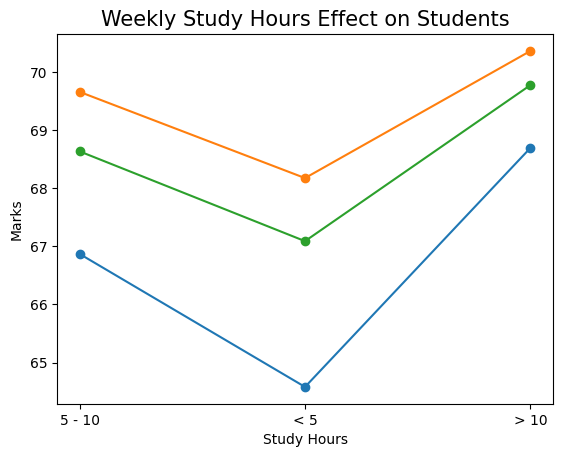

In [161]:
grouped6 = df.groupby("WklyStudyHours").agg({"MathScore": "mean", "ReadingScore": "mean" , "WritingScore": "mean"})

plt.plot( grouped6, marker = "o"  )
plt.title("Weekly Study Hours Effect on Students", fontsize= 15)
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.savefig(" Weekly Study HOurs Efffect on Students", dpi = 300)
plt.show()